# 20211012-gridplot

In [91]:
import os
import glob
import attrdict
import matplotlib.pyplot as plt

In [92]:
base = 'data/embeddingsizes/champsim_results'

In [101]:
def parse_champsim_result_file(f):
    data = {
        'instructions': [],
        'cycles': [],
        'heartbeat_ipcs': [],
        'cumulative_ipcs': [],
        'cumulative_sim_times': [],
        'finished_ipc': None
    }
    
    for line in f:
        line_tokens = line.split(' ')
        
        if 'Heartbeat' in line:
            #print(line)
            instructions = int(line_tokens[line_tokens.index('instructions:') + 1])
            cycles = int(line_tokens[line_tokens.index('cycles:') + 1])
            heartbeat_ipc = float(line_tokens[line_tokens.index('heartbeat') + 2])
            cumulative_ipc = float(line_tokens[line_tokens.index('cumulative') + 2])
            cumulative_sim_time = int(line_tokens[line_tokens.index('time:') + 1]) * 3600 \
                              + int(line_tokens[line_tokens.index('time:') + 3]) * 60 \
                              + int(line_tokens[line_tokens.index('time:') + 5]) \
            
            data['instructions'].append(instructions)
            data['cycles'].append(cycles)
            data['heartbeat_ipcs'].append(heartbeat_ipc)
            data['cumulative_ipcs'].append(cumulative_ipc)
            data['cumulative_sim_times'].append(cumulative_sim_time)
            
        if 'Finished' in line:
            #print(line)
            finished_ipc = float(line_tokens[line_tokens.index('cumulative') + 2])
            data['finished_ipc'] = finished_ipc
    
    return attrdict.AttrDict(data)

def load_champsim_results(base, tracename):
    base_path = base + f'/*/*{tracename}*.txt'
    data = {}
    print('Loading ChampSim results from:', base_path)
    variation_paths = glob.glob(base_path)
    for path in variation_paths:
        variation_name = path.split('/')[-2]
        # DEBUG: FOR THIS TRACE ONLY
        variation_name = variation_name.replace('_embed_size', '')
        print('Found variation:', variation_name)
        with open(path, 'r') as f:
            data[variation_name] = parse_champsim_result_file(f)
    return data
    
data = load_champsim_results(base, trace)

Loading ChampSim results from: data/embeddingsizes/champsim_results/*/*mcf-s0*.txt
Found variation: pc-16_page-32
Found variation: pc-16_page-128
Found variation: pc-16_page-256
Found variation: pc-32_page-32
Found variation: pc-32_page-64
Found variation: pc-32_page-128
Found variation: pc-32_page-256
Found variation: pc-64_page-32
Found variation: pc-64_page-64
Found variation: pc-64_page-128
Found variation: pc-64_page-256
Found variation: pc-128_page-32
Found variation: pc-128_page-64
Found variation: pc-128_page-128
Found variation: pc-128_page-256
Found variation: pc-256_page-32
Found variation: pc-256_page-64
Found variation: pc-256_page-128
Found variation: pc-256_page-256


## Plot heartbeat IPCs

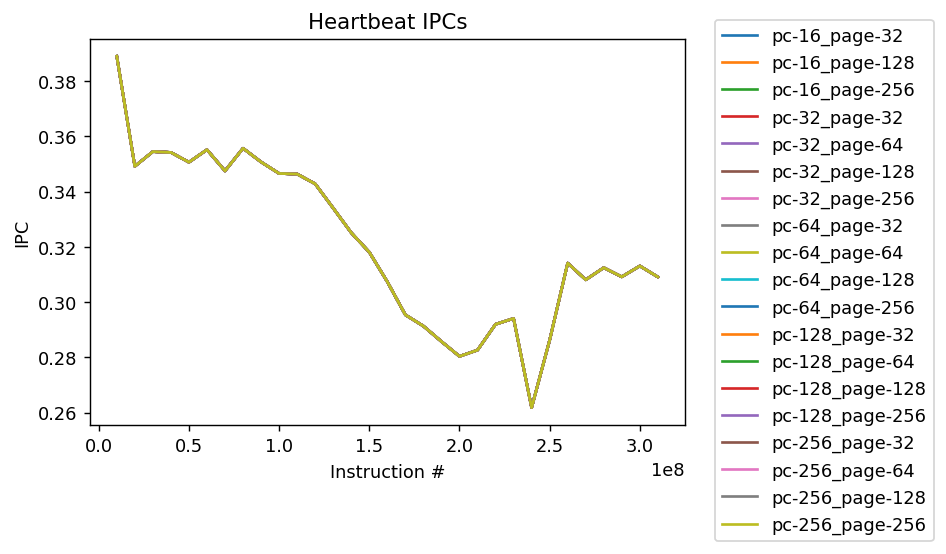

In [72]:
fig, ax = plt.subplots(dpi=128)
for var, var_data in data.items():
    ax.plot(var_data.instructions, var_data.heartbeat_ipcs, label=var)
ax.set_title('Heartbeat IPCs')
ax.set_xlabel('Instruction #')
ax.set_ylabel('IPC')
ax.legend(loc=(1.05, -0.3))

## Plot final cumulative IPCs

Text(0, 0.5, 'IPC')

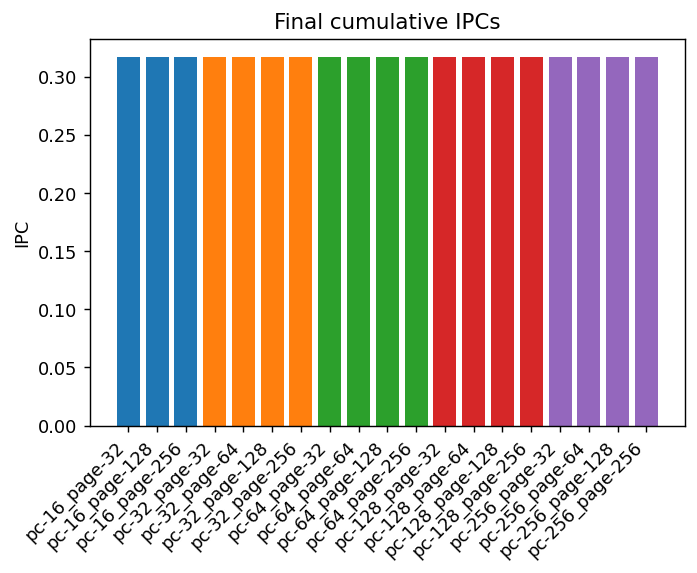

In [89]:
# DEBUG - rewrite, hardcoded
def color_of_variation(var):
    pc = int(var.replace('_page', '').split('-')[1])
    page = int(var.replace('_page', '').split('-')[2])
    if pc == 16:
        color = 'C0'
    elif pc == 32:
        color = 'C1'
    elif pc == 64:
        color = 'C2'
    elif pc == 128:
        color = 'C3'
    elif pc == 256:
        color = 'C4'
    return color
    
color_of_variation('pc-32_page-64')


fig, ax = plt.subplots(dpi=128)
labels = []
for i, (var, var_data) in enumerate(data.items()):
    ax.bar(i, var_data.finished_ipc, color=color_of_variation(var))
    labels.append(var)
    
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
    
ax.set_title('Final cumulative IPCs')
ax.set_ylabel('IPC')